### Fault Tolerance Example In Persistance

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_cohere import ChatCohere
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
import time


In [2]:
# state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str


In [ ]:
# steps definition
def step1(state: CrashState) -> CrashState:
    print("Step 1 executed")
    return {'step1': "done", "input": state["input"]}

def step2(state: CrashState) -> CrashState:
    print('step2 hanging....now manually interuppt form the notebook toolbar (stop btn)')
    time.sleep(30) # crash
    return {'step2': 'done'}

def step3(state: CrashState) -> CrashState:
    print('step 3 executed')
    return {'step3': 'done'}


In [6]:
# graph 
builder = StateGraph(CrashState)

#nodes
builder.add_node('step1', step1)
builder.add_node('step2', step2)
builder.add_node('step3', step3)

# edges
builder.add_edge(START, 'step1')
builder.add_edge('step1', 'step2')
builder.add_edge('step2', 'step3')
builder.add_edge('step3', END)

checkpointer = InMemorySaver()

workflow = builder.compile(checkpointer=checkpointer)


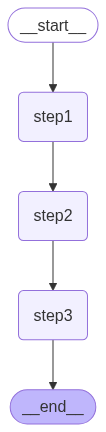

In [ ]:
workflow


In [8]:
workflow.invoke({'input': 'start'}, config={'configurable': {'thread_id': 't-1'}})


Step 1 executed
step2 hanging....now manually interuppt form the notebook toolbar (stop btn)


KeyboardInterrupt: 

In [10]:
list(workflow.get_state_history({'configurable': {'thread_id': 't-1'}}))


[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': 't-1', 'checkpoint_ns': '', 'checkpoint_id': '1f071430-e415-6764-8001-7f71bd573723'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': 't-1'}, created_at='2025-08-04T14:55:26.439613+00:00', parent_config={'configurable': {'thread_id': 't-1', 'checkpoint_ns': '', 'checkpoint_id': '1f071430-e40b-6b25-8000-81645ea2f15d'}}, tasks=(PregelTask(id='9a831746-0d01-6f6c-3871-b0ce924a21df', name='step2', path=('__pregel_pull', 'step2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step1',), config={'configurable': {'thread_id': 't-1', 'checkpoint_ns': '', 'checkpoint_id': '1f071430-e40b-6b25-8000-81645ea2f15d'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': 't-1'}, created_at='2025-08-04T14:55:26.435613+00:00', parent_config={'configurable': {'thread_id': 't-1', 'checkpo

In [11]:
final_state = workflow.invoke(None, config={'configurable': {'thread_id': 't-1'}})
print(final_state)


step2 hanging....now manually interuppt form the notebook toolbar (stop btn)
step 3 executed
{'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}


In [12]:
workflow.get_state({'configurable': {'thread_id': 't-1'}})


StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 't-1', 'checkpoint_ns': '', 'checkpoint_id': '1f071438-ba03-62f2-8003-93d15d245b0b'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': 't-1'}, created_at='2025-08-04T14:58:56.776472+00:00', parent_config={'configurable': {'thread_id': 't-1', 'checkpoint_ns': '', 'checkpoint_id': '1f071438-b9f3-6cb2-8002-78be1f014194'}}, tasks=(), interrupts=())